In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [71]:
df = pd.read_csv('C:/Users/DeLL/AI/rolling_stones_spotify.csv')

In [72]:
duplicate_rows = df[df.duplicated(subset='id', keep=False)]
if not duplicate_rows.empty:
    print("Duplicate rows based on 'id' column:")
    print(duplicate_rows)
else:
    print("No duplicate rows found based on 'id' column.")

No duplicate rows found based on 'id' column.


In [73]:
missing_values = df.isnull().sum()
if missing_values.any():
    print("\nColumns with missing values:")
    print(missing_values)
else:
    print("\nNo missing values found.")


No missing values found.


In [74]:
# Define the numerical columns and their valid ranges
columns_to_check = {
    'acousticness': (0, 1),
    'danceability': (0, 1),
    'energy': (0, 1),
    'instrumentalness': (0, 1),
    'liveness': (0, 1),
    'speechiness': (0, 1),
    'valence': (0, 1),
    'loudness': (-60, 0) ,
    'popularity': (0, 100)  # Assuming popularity is rated between 0 and 100
}

for column, (min_val, max_val) in columns_to_check.items():
    irrelevant_entries = df[(df[column] < min_val) | (df[column] > max_val)]

if not irrelevant_entries.empty:
    print("\nIrrelevant entries found:")
    print(irrelevant_entries)
else:
    print("\nNo irrelevant entries found.")



No irrelevant entries found.


In [75]:
numerical_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']


In [76]:
from scipy.stats import zscore

z_scores = np.abs(df[numerical_columns].apply(zscore))



for column in numerical_columns:
    outliers = df[z_scores[column] > 3]
    if not outliers.empty:
        print(f"\nOutliers in {column} based on z-score:")
        print(outliers)
    else:
        print(f"\nNo outliers found in {column} based on z-score.")



Outliers in acousticness based on z-score:
     Unnamed: 0                                               name  \
165         165                         100 Years Ago - Piano Demo   
807         807            Key To The Highway - Piano Instrumental   
818         818  Key To The Highway - Piano Instrumental/Remast...   
997         997                                        Fool To Cry   

                            album release_date  track_number  \
165      Goats Head Soup (Deluxe)   2020-09-04             4   
807                    Dirty Work   1986-03-24            11   
818  Dirty Work (Remastered 2009)   1986-03-24            11   
997                Black And Blue   1976-04-23             7   

                         id                                   uri  \
165  7mJffnVw9vwPj4bh42lN2l  spotify:track:7mJffnVw9vwPj4bh42lN2l   
807  5vaIQW6IAjNo5tUoZGTiKE  spotify:track:5vaIQW6IAjNo5tUoZGTiKE   
818  3As7nxoMY2gOMxVdksIU2F  spotify:track:3As7nxoMY2gOMxVdksIU2F   
997  2hj

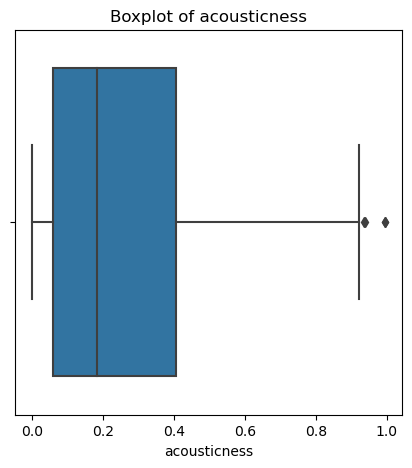

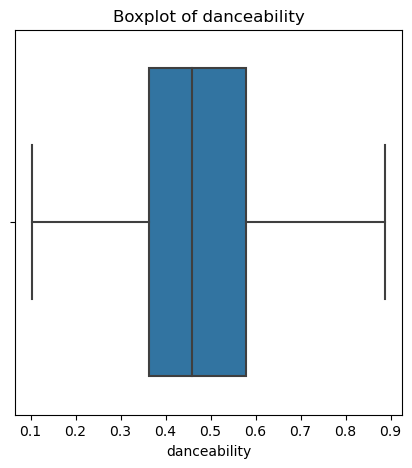

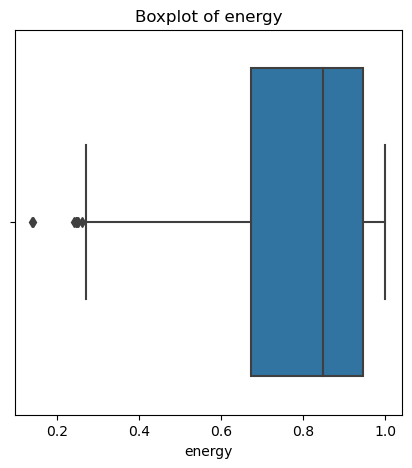

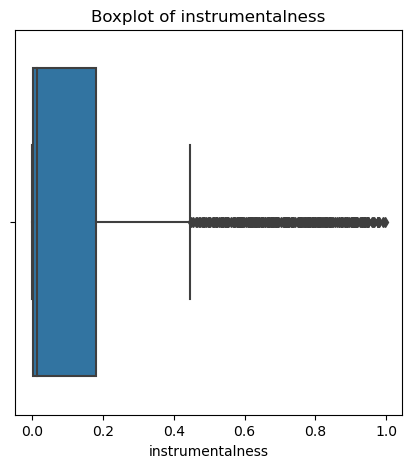

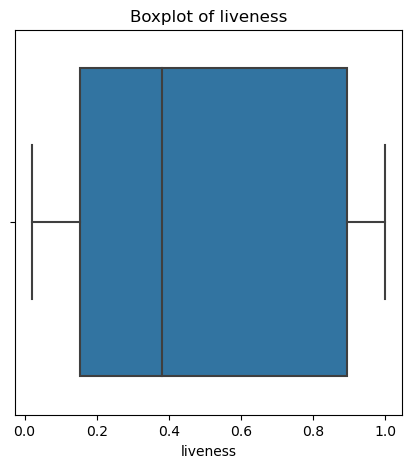

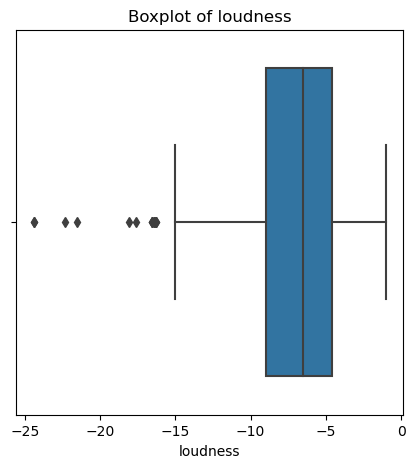

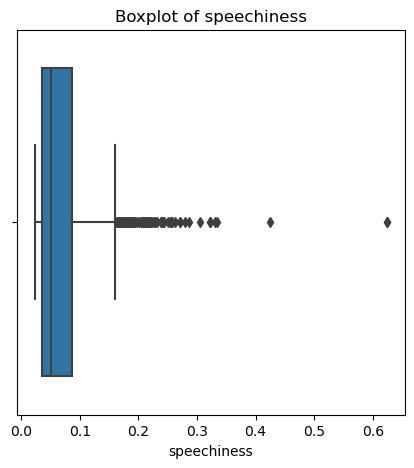

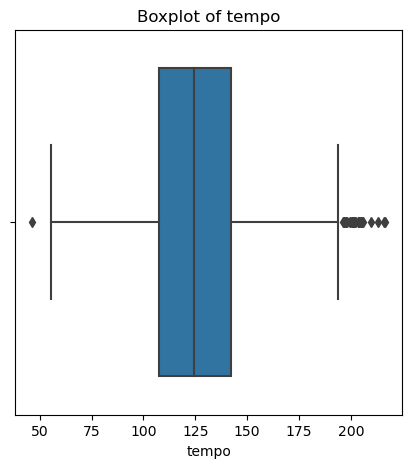

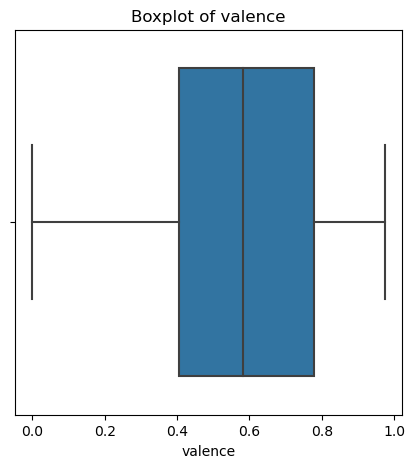

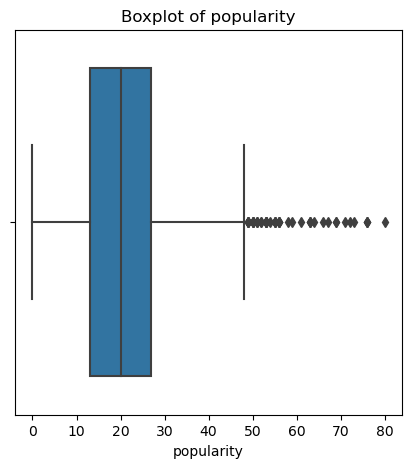

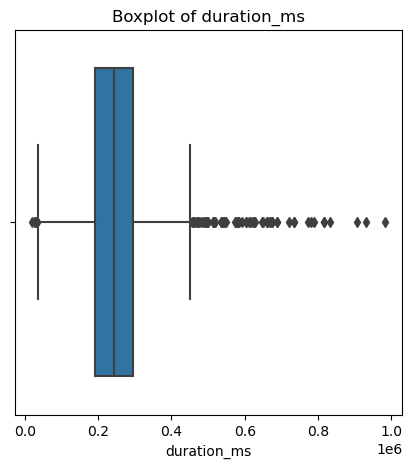

In [77]:
for column in numerical_columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [84]:
# Handle outliers by capping them based on z-scores
for column in numerical_columns:
    mean = df[column].mean()
    std_dev = df[column].std()
    
    # Define the lower and upper bounds
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

print("\nOutliers handled by capping based on z-score.")



Outliers handled by capping based on z-score.


In [79]:
df.to_csv('cleaned_rolling_stones_spotify.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_spotify_rolling_stones.csv'.")

df = pd.read_csv('cleaned_rolling_stones_spotify.csv') 


Cleaned dataset saved as 'cleaned_spotify_rolling_stones.csv'.


In [86]:
popular_songs_threshold = 70  # score to consider a song as popular
album_popularity = df.groupby('album')['popularity'].mean().sort_values(ascending=False)

# Recommend top 2 albums based on average popularity
top_albums = album_popularity.head(2)
print(f"Top 2 recommended albums based on popular songs:\n{top_albums}")

Top 2 recommended albums based on popular songs:
album
Sticky Fingers (Remastered)    50.393468
Some Girls                     45.346734
Name: popularity, dtype: float64


In [99]:
top_five_albums= album_popularity.head(5)

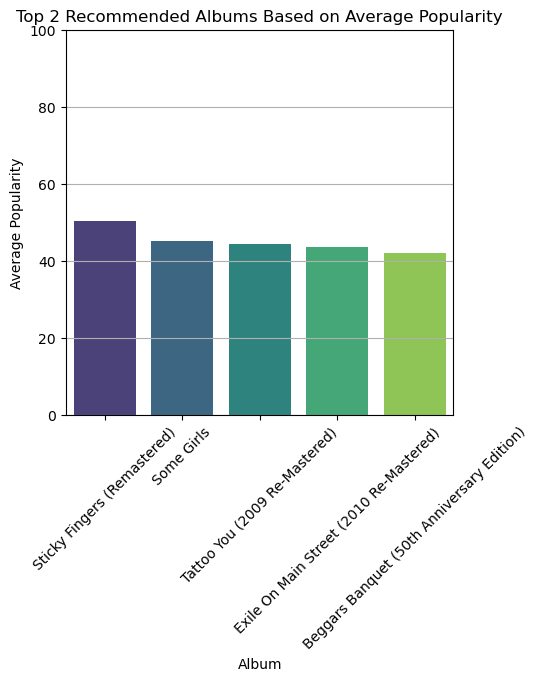

In [101]:
# Visualize the top recommended albums
plt.figure(figsize=(5,5))
sns.barplot(x=top_five_albums.index, y=top_five_albums.values, palette='viridis')
plt.title('Top 2 Recommended Albums Based on Average Popularity')
plt.xlabel('Album')
plt.ylabel('Average Popularity')
plt.ylim(0, 100)  # Assuming popularity is scored out of 100
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

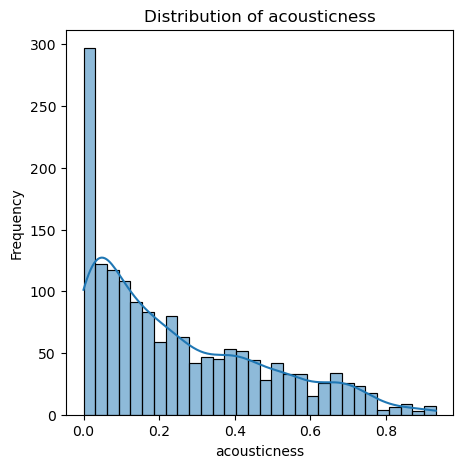

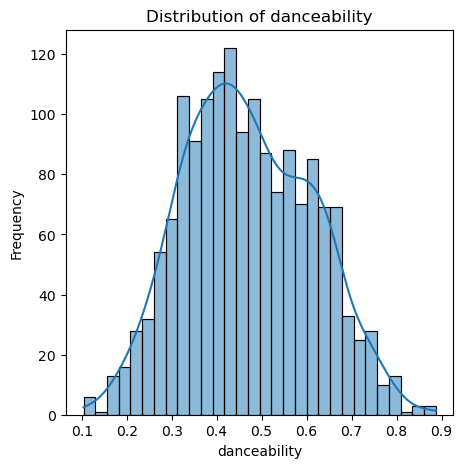

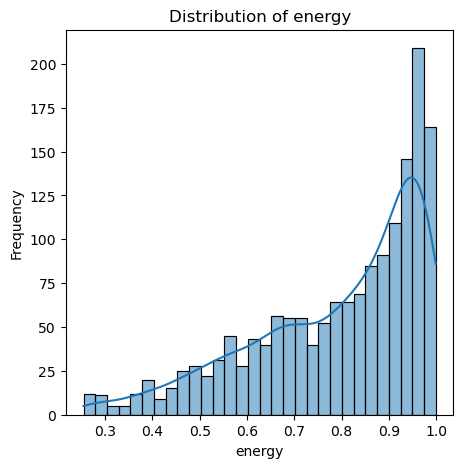

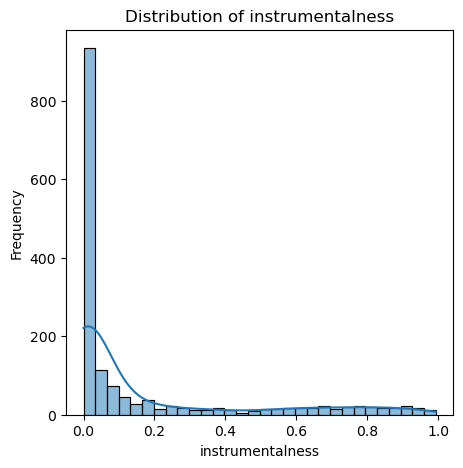

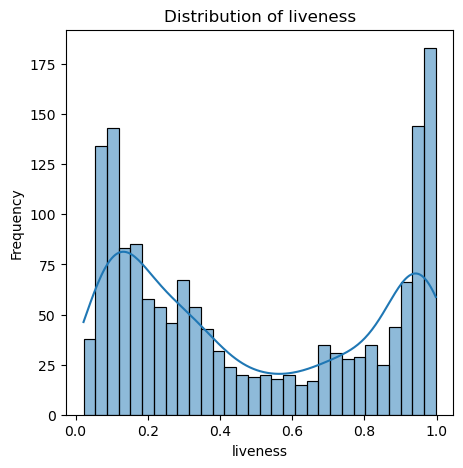

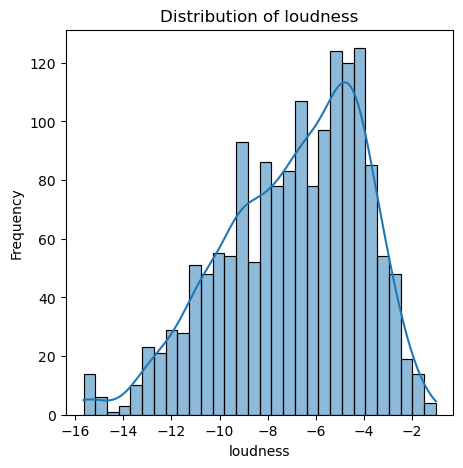

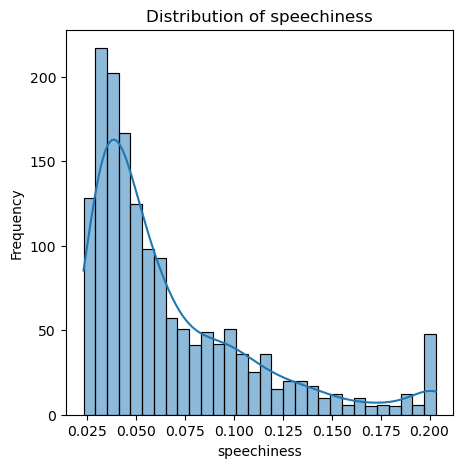

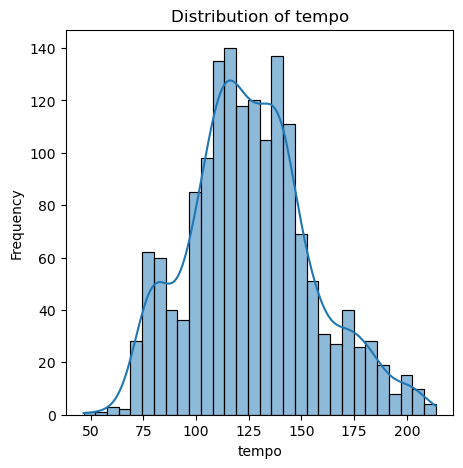

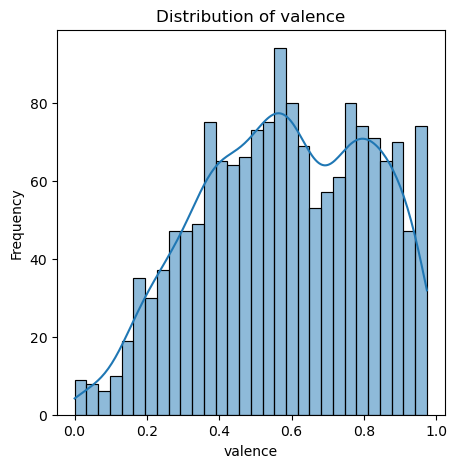

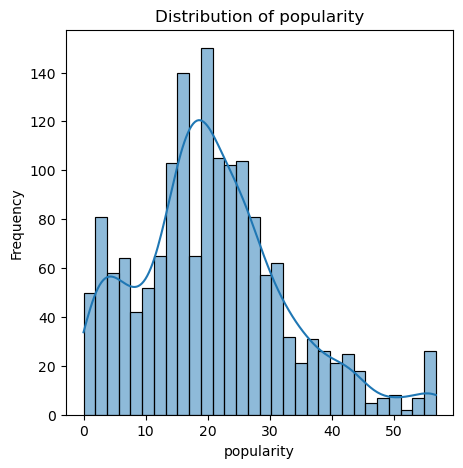

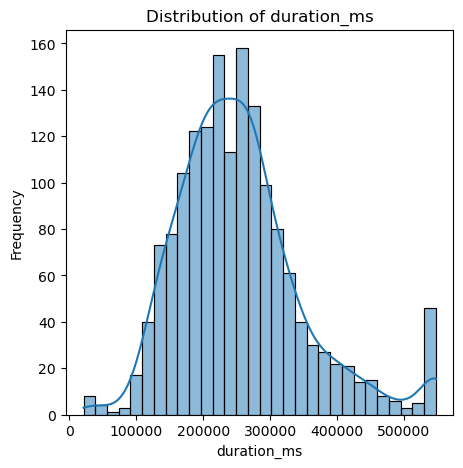

In [178]:
# Patterns of features of songs

for column in numerical_columns:
    plt.figure(figsize=(5, 5))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

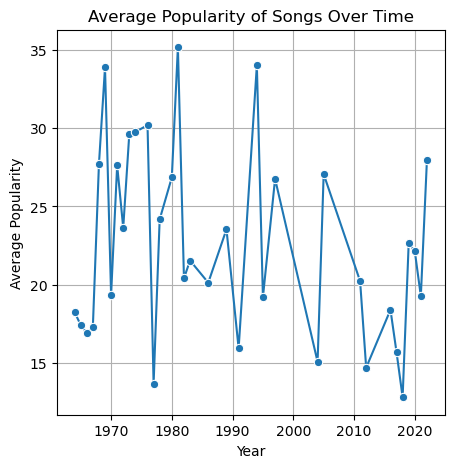

In [107]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
popularity_over_time = df.groupby('year')['popularity'].mean()

plt.figure(figsize=(5, 5))
sns.lineplot(x=popularity_over_time.index, y=popularity_over_time.values, marker='o')
plt.title('Average Popularity of Songs Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)
plt.show()


# PCA

In [108]:
ss= StandardScaler()

In [124]:
df_std= ss.fit_transform(df[numerical_columns])

In [133]:
df_std.shape

(1610, 11)

In [134]:
df_std.var(axis=0).sum()

11.0

In [143]:
pca = PCA()
comp = pca.fit_transform(df_std)

In [144]:
comp.shape

(1610, 11)

In [145]:
comp.var(axis=0).sum()

10.999999999999991

In [147]:
((pca.explained_variance_ratio_)*100).cumsum()

array([ 28.5718064 ,  43.50970367,  55.26472248,  64.97088545,
        73.72326746,  80.41596374,  86.70085872,  91.86495772,
        95.97713564,  98.48188949, 100.        ])

In [148]:
pca = PCA(n_components= 7)

In [149]:
comp = pca.fit_transform(df_std)

In [150]:
comp.shape

(1610, 7)

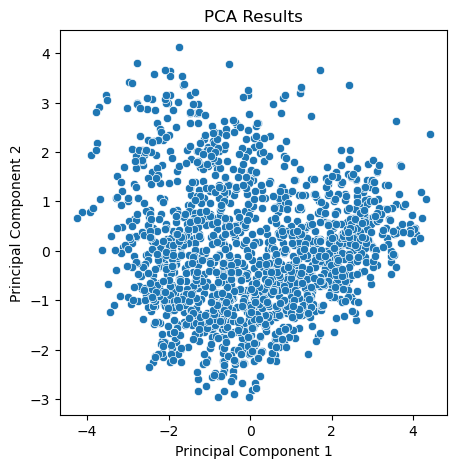

In [152]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=comp[:, 0], y=comp[:, 1])
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### K-MEANS CLUSTERING

In [155]:
#Deciding the number of clusters using the elbow method

Errors = []

for i in range(1, len(numerical_columns)):

    kmeans= KMeans(n_clusters= i)
    kmeans.fit(comp)
    Errors.append(kmeans.inertia_)

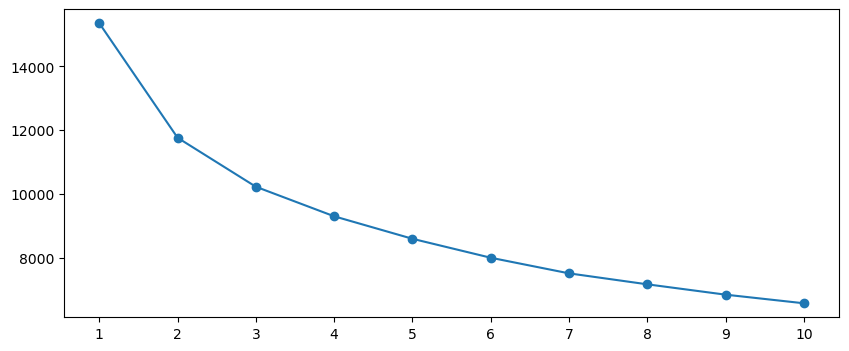

In [159]:
plt.figure(figsize=(10,4))
plt.plot(range(1, len(numerical_columns)), Errors, marker = 'o')
plt.xticks(range(1, len(numerical_columns)))
plt.show()

In [173]:
#Kmeans Clustering Algorithm

kmeans= KMeans(n_clusters= 3)
df['cluster_membership'] = kmeans.fit_predict(comp)

In [174]:
# Define each cluster based on features
cluster_centers = kmeans.cluster_centers_

In [175]:
# Inverse transform the cluster centers to original feature space
cluster_centers_original = pca.inverse_transform(cluster_centers)

In [176]:
# Create a DataFrame for cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=numerical_columns)

In [170]:
cluster_centers_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,-0.312204,0.612432,0.195864,0.262357,-0.400643,0.205642,-0.416561,-0.110156,0.843041,0.238838,-0.332267
1,0.713642,0.248944,-1.214941,-0.264139,-0.615185,-1.014514,-0.501960,-0.348744,-0.325451,0.082674,-0.154732
2,-0.231809,-0.823567,0.740232,-0.065350,0.889437,0.574781,0.818048,0.383786,-0.615700,-0.310005,0.462066


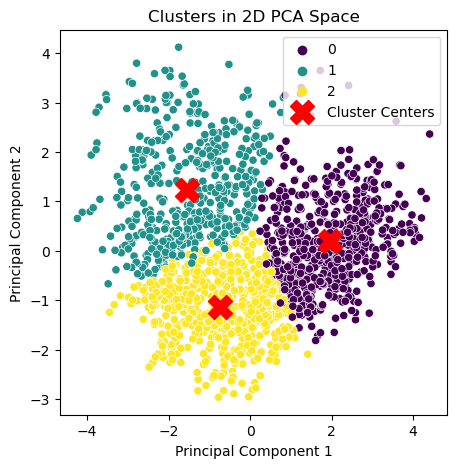

In [177]:
# Visualize clusters in 2D PCA space
plt.figure(figsize=(5, 5))
sns.scatterplot(x=comp[:, 0], y=comp[:, 1], hue=df['cluster_membership'], palette='viridis', legend='full')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
plt.title('Clusters in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()